## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Both float64 columns 'days_employed' and 'total_income' contain 2,174 null values. Since both columns have the same amount of null values, it is possible that entries which do not have values for 'days_employed' also do not have a value for 'total_income' and vice-versa.

In [ ]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [ ]:
df['debt'].mean()

0.08088269454123112

In [ ]:
df['children'].mean()

0.5389082462253194

In [ ]:
df['children'].median()

0.0

In [ ]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

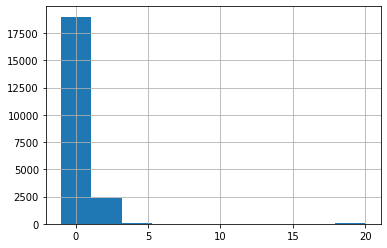

In [ ]:
df['children'].hist()

The majority of families in the data frame have 0 children. There are a few unusual outliers with the value 20. No one has reported to have 6-19 children in their family. It is possible that the data assigned with the value 20 was coded incorrectly and actually represents "children greater than 5." It is impossible to have a negative amount of children. Since there are outliers within the data, data entries involving a negative amount of children should be corrected with the median value.

In [ ]:
df['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [ ]:
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [ ]:
df.groupby(['family_status', 'family_status_id']).size()

family_status      family_status_id
civil partnership  1                    4177
divorced           3                    1195
married            0                   12380
unmarried          4                    2813
widow / widower    2                     960
dtype: int64

Each 'family_status' has a unique 'family_status_id'.

In [ ]:
df['dob_years'].mean()

43.29337979094077

In [ ]:
df['dob_years'].median()

42.0

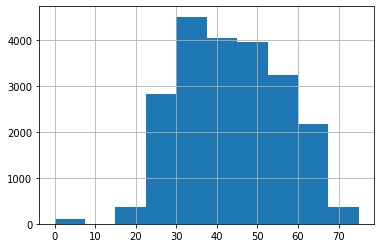

In [ ]:
df['dob_years'].hist()

In [ ]:
df.loc[df['dob_years'] < 20, 'dob_years'].value_counts()

0     101
19     14
Name: dob_years, dtype: int64

There are 101 'dob_years' entries with the value 0, which indicate missing values. Since there are no extreme outliers, the mean value can be used to fill in each 0 value.

In [ ]:
df['total_income'].mean()

167422.30220817294

In [ ]:
df['total_income'].median()

145017.93753253992

In [ ]:
df['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

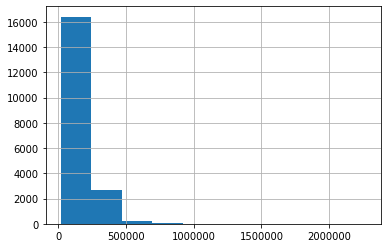

In [ ]:
df['total_income'].hist()

The 'total_income' data is right skewed, indicating the presence of outliers with very high income.

In [ ]:
df['days_employed'].mean()

63046.49766147338

In [ ]:
df['days_employed'].median()

-1203.369528770489

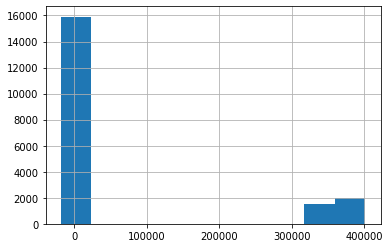

In [ ]:
df['days_employed'].hist()

There are negative values in 'days_employed', which indicate unusual entries. There are also duplicates in 'education' that should be combined.

In [ ]:
df.groupby(['education_id','education']).size()

education_id  education          
0             MASTERS DEGREE           274
              Masters Degree           268
              masters degree          4718
1             SECONDARY EDUCATION      772
              Secondary Education      711
              secondary education    13750
2             BACHELOR DEGREE           29
              Bachelor Degree           47
              bachelor degree          668
3             PRIMARY EDUCATION         17
              Primary Education         15
              primary education        250
4             ACADEMIC DEGREE            1
              Academic Degree            1
              academic degree            4
dtype: int64

There are duplicate education names for each education_id that are better when combined.

In [ ]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

'XNA' is not a commonly recognized gender.

In [ ]:
df['income_type'].value_counts()

employee                       11119
partner                         5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unempoyed                          2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

'Unemployed' is mistakenly spelled as 'unemployed'.

In [ ]:
df['purpose'].value_counts()

wedding ceremony                                 797
having a wedding                                 777
to have a wedding                                774
real estate transactions                         676
buy commercial real estate                       664
housing transactions                             653
buying property for renting out                  653
transactions with the residential real estate    651
housing                                          647
purchase of the house                            647
purchase of the house for my family              641
construction of own property                     635
property                                         634
transactions with my real estate                 630
building a real estate                           626
buy real estate                                  624
purchase of my own house                         620
building a property                              620
property renovation                           

### Conclusion

After inspecting the general information of the data file, it is discovered that there are 21,525 entries. The 'children', 'total_income', and 'days_employed' columns have a skewed distribution. Columns 'total_income' and 'days_employed' also contain 2,174 NaN values each. There is an unrecognized gender in the 'gender' column, and a mispelling in the 'income_type' column. The values in the 'education' column contain duplicate entries that can be cleaned up by converting all letters into a uniform case.

### Step 2. Data preprocessing

### Processing missing values

In [ ]:
df.loc[df['children'] < 0, 'children'] = df['children'].median()

It is impossible for a person to have a negative amount of children. People can either have them (a value over 0), or not have them (a value at 0). Negative 'children' values are replaced with the median value because there are outliers with the value of 20. A total of 47 datapoints were processed.

In [ ]:
df.loc[df['dob_years'] == 0, 'dob_years'] = df['dob_years'].mean()

It is impossible for a 0-year-old to have already worked and applied for a loan. 'dob_years' containing the value 0 are replaced with the mean value because there are no outliers. A total of 101 datapoints were processed.

In [ ]:
df[df['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0.0,NaN,65.0,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0.0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0.0,NaN,63.0,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0.0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0.0,NaN,54.0,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [ ]:
df[df['total_income'].isna()].tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21489,2.0,NaN,47.0,Secondary Education,1,married,0,M,partner,0,NaN,purchase of a car
21495,1.0,NaN,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0.0,NaN,48.0,MASTERS DEGREE,0,married,0,F,partner,0,NaN,building a property
21502,1.0,NaN,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21510,2.0,NaN,28.0,secondary education,1,married,0,F,employee,0,NaN,car purchase


In [ ]:
df.loc[df['total_income'].isna(), 'education'].value_counts()

secondary education    1408
masters degree          496
SECONDARY EDUCATION      67
Secondary Education      65
bachelor degree          55
Masters Degree           25
MASTERS DEGREE           23
primary education        19
Bachelor Degree           7
BACHELOR DEGREE           7
PRIMARY EDUCATION         1
Primary Education         1
Name: education, dtype: int64

In [ ]:
df.loc[df['total_income'].isna(), 'income_type'].value_counts()

employee         1105
partner           508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [ ]:
df.loc[df['total_income'].isna(), 'children'].value_counts()

0.0     1442
1.0      475
2.0      204
3.0       36
20.0       9
4.0        7
5.0        1
Name: children, dtype: int64

In [ ]:
df.loc[df['total_income'].isna(), 'debt'].value_counts()

0    2004
1     170
Name: debt, dtype: int64

Entries which do not have a value for 'total_income' also do not have a value for 'days_employed'. It appears that the entries containing both a NaN value for 'total_income' and a NaN value for 'days_employed' are random and have no relation to a third attribute.

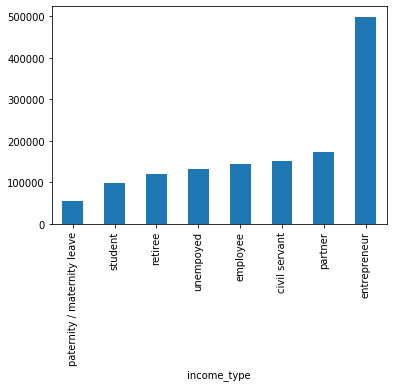

In [ ]:
df.groupby('income_type')['total_income'].median().sort_values().plot(kind='bar')

In [ ]:
df.pivot_table(index='income_type', values='total_income', aggfunc=['count', 'mean', 'median', 'min'])

,count,mean,median,min
,total_income,total_income,total_income,total_income
income_type,,,,
civil servant,1312,170898.309923,150447.935283,29200.077193
employee,10014,161380.260488,142594.396847,21367.648356
entrepreneur,1,499163.144947,499163.144947,499163.144947
partner,4577,202417.461462,172357.950966,28702.812889
paternity / maternity leave,1,53829.130729,53829.130729,53829.130729
retiree,3443,137127.465690,118514.486412,20667.263793
student,1,98201.625314,98201.625314,98201.625314
unempoyed,2,131339.751676,131339.751676,59956.991984


In [ ]:
for income_type in df['income_type'].unique():
    df.loc[df['income_type'] == income_type] = df.loc[df['income_type'] == income_type].fillna(df.loc[df['income_type'] == income_type, 'total_income'].median())

In this for loop, each unique value in the 'income_type' column is used to replace the NaN values in 'total_income' with the median value for each income type.

In [ ]:
df['total_income'].isna().sum()

0

Grouping the clients by income_type makes sense because there are income groups that make more money than others. For example, those who are on parental leave or are students make less money since they have less opportunities to work. Missing values in 'total_income' are filled with the median value for each income group because the income data is right skewed. A total of 2,174 datapoints were processed.

Missing values in 'days_employed' are left alone because it is out of the scope of this project.

In [ ]:
df.loc[df['gender'] == 'XNA', 'gender'] = 'F'

'XNA' is not a recognized gender and would best be changed to the most common gender in the data frame. One datapoint was processed here.

In [ ]:
df.loc[df['income_type'] == 'unempoyed', 'income_type'] = 'unemployed'

'unempoyed' is a misspelling for 'unemployed'. Two datapoints were processed.

### Conclusion

A total of 2,325 datapoints which needed to be preprocessed were identified. Values identified are: 

1. Negative number of children in the family
2. Age of customer being zero
3. NA values in total income
4. Unrecognized XNA gender in gender column
5. 'Unempoyed' misspelling in income type column

There is an equal amount of NA values for 'total_income' and 'days_unemployed', which may be due to the information supplied being optional.

The .fillna() function was used to fill in missing values. .fillna() replaces NaN values with any specified value.

The median was used to fill in missing values in 'children' and 'total_income' because skew was present. 'dob_years' did not have an extreme skew, so the mean value was used to fill in values for this column. The most common gender was used to fill in the 'XNA' value in the 'gender' column.

### Data type replacement

In [ ]:
df['days_employed'] = df['days_employed'].astype('int')

In [ ]:
df['total_income'] = df['total_income'].astype('int')

### Conclusion

'days_employed' and 'total_income' are both converted from a float64 data type into a integer data type. When days and income are counted, they are normally counted using whole numbers. .astype() converts a particular column data type into a different, specified data type.

### Processing duplicates

In [ ]:
df['education'] = df['education'].str.lower()

In [ ]:
df.duplicated().sum()

71

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

### Conclusion

Duplicate entries in education only differed in that some letters had different cases. This is corrected by making all letters lowercase. 71 duplicates were found in the dataset and deleted using .drop_duplicates(). .reset_index(drop=True) eliminates the old index values and re-indexes the dataframe. 

### Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

wordnet_lemma = WordNetLemmatizer()

def tokenize_verbs(row):
    return [wordnet_lemma.lemmatize(w, pos='v') for w in nltk.word_tokenize(row)]

df['lemmas_purpose'] = df['purpose'].apply(tokenize_verbs)

In [ ]:
df['lemmas_purpose'].value_counts()

[wed, ceremony]                                         791
[have, a, wed]                                          768
[to, have, a, wed]                                      765
[real, estate, transactions]                            675
[buy, commercial, real, estate]                         661
[house, transactions]                                   652
[buy, property, for, rent, out]                         651
[transactions, with, the, residential, real, estate]    650
[purchase, of, the, house]                              646
[house]                                                 646
[purchase, of, the, house, for, my, family]             638
[construction, of, own, property]                       635
[property]                                              633
[transactions, with, my, real, estate]                  627
[build, a, real, estate]                                624
[buy, real, estate]                                     621
[purchase, of, my, own, house]          

### Conclusion

The WordNet Lemmatizer looks up a word's lemma in the WordNet database. Verbs were processed using the parts of speech parameter of the .lemmatize() method of the WordNet database in order to standardize them and prime them for categorization. A new column was created for lemmatized results. After lemmatization, keywords are now easier to extract.

### Categorizing Data

In [ ]:
def categorize(row):
    if "car" in row or "cars" in row:
        return "car"
    if "wed" in row:
        return "wedding"
    if "estate" in row or "house" in row or "property" in row:
        return "house"
    if "university" in row or "education" in row or "educate" in row:
        return "education"
    
df['categorized'] = df['lemmas_purpose'].apply(categorize)

In [ ]:
df['categorized'].isna().sum()

0

In [ ]:
df['categorized'].value_counts()

house        10811
car           4306
education     4013
wedding       2324
Name: categorized, dtype: int64

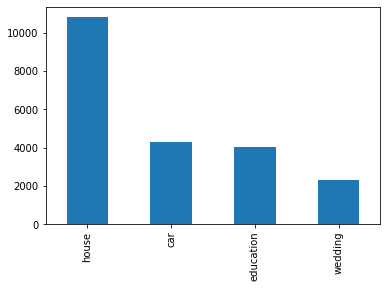

In [ ]:
df['categorized'].value_counts().plot.bar()

### Conclusion

The data is categorized into four categories, of which are (in decreasing frequency): house, car, education, and wedding. A total of 9 different lemmatized words were used to place each purpose into their respective category. Categorization helps create more straightforward visualizations and can also help reveal more general trends.

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [ ]:
df.pivot_table(index='children', values='debt', aggfunc=['count', 'mean'])

,count,mean
,debt,debt
children,,
0.0,14138,0.075258
1.0,4808,0.092346
2.0,2052,0.094542
3.0,330,0.081818
4.0,41,0.097561
5.0,9,0.000000
20.0,76,0.105263


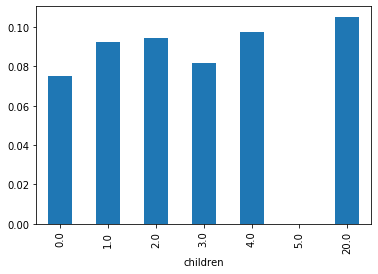

In [ ]:
df.groupby('children')['debt'].mean().plot(kind='bar')

### Conclusion

Families with children default on loans at a slightly greater rate than families without children. 

There is a general increase of loan defaults as the amount of children in the family increases. A possible reason why there are no defaults in families with 5 children is because only 9 of the 21525 entries reported 5 children, which is a very small sample size.

- Is there a relation between marital status and repaying a loan on time?

In [ ]:
df.pivot_table(index='family_status', values='debt', aggfunc=['count', 'mean'])

,count,mean
,debt,debt
family_status,,
civil partnership,4151,0.093471
divorced,1195,0.071130
married,12339,0.075452
unmarried,2810,0.097509
widow / widower,959,0.065693


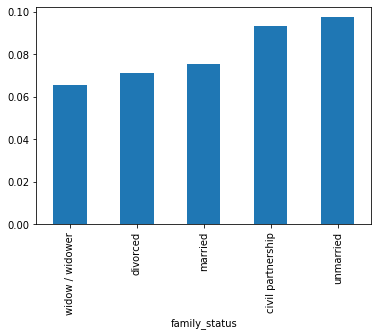

In [ ]:
bar = df.groupby('family_status')['debt'].mean().sort_values().plot(kind='bar')

In [ ]:
df.pivot_table(index='family_status', values='dob_years', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,dob_years,dob_years,dob_years
family_status,,,
civil partnership,4151,42.288403,41.0
divorced,1195,45.880279,46.0
married,12339,43.719051,43.0
unmarried,2810,38.610211,36.0
widow / widower,959,56.729371,58.0


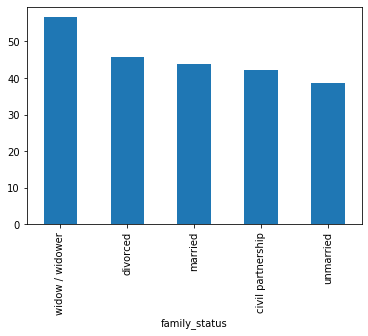

In [ ]:
bar = df.groupby('family_status')['dob_years'].mean().sort_values(ascending=False).plot(kind='bar')

### Conclusion

People who have never married have a higher rate of defaulting on a loan, followed by people in a civil partnership. Widowed people are least likely to default on a loan.

Another finding that may be related to this trend is that a person's age correlates with family status and ability to pay off a loan. For example, the old are more likely to be widowed and are more likely to pay off a loan, while the young are more likely to be unmarried and less likely to pay off a loan.

- Is there a relation between income level and repaying a loan on time?

In [ ]:
df.groupby('debt')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
debt,,,,,,,,
0,19713.0,165687.076599,98223.735184,21205.0,107499.0,142594.0,196593.0,2265604.0
1,1741.0,161158.393452,97705.516594,20667.0,108252.0,142594.0,187583.0,2200852.0


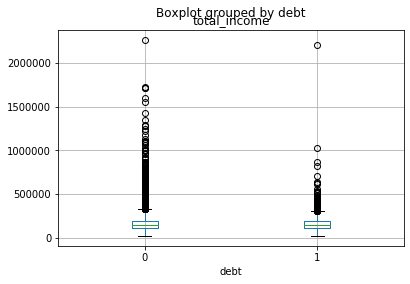

In [ ]:
df.boxplot(by='debt', column=['total_income'], showfliers=True) 

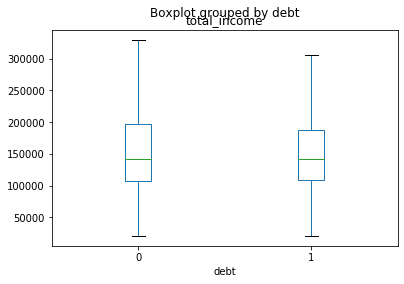

In [ ]:
df.boxplot(by='debt', column=['total_income'], showfliers=False, grid=False) 

### Conclusion

After comparing the 1st, 2nd, and 3rd quartile 'total_income' values for people who have not defaulted on a loan vs. the incomes of those who have defaulted on a loan, it appears that there is no strong relation between income level and repaying a loan on time. The 2nd quartile for example, has the exact same value (142,594) for both debt categories.

- How do different loan purposes affect on-time repayment of the loan?

In [ ]:
df.pivot_table(index='categorized', values='debt', aggfunc=['count', 'mean'])

,count,mean
,debt,debt
categorized,,
car,4306,0.093590
education,4013,0.092200
house,10811,0.072334
wedding,2324,0.080034


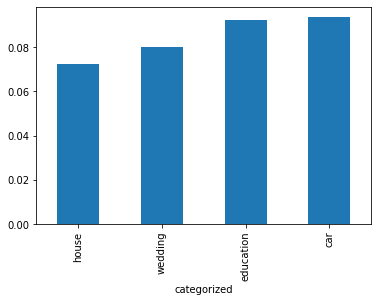

In [ ]:
bar = df.groupby('categorized')['debt'].mean().sort_values().plot(kind='bar')

### Conclusion

Car loans have the lowest rate of on-time loan repayment, closely followed by education loans. House loans have the highest rate of on-time loan repayment.

### Step 4. General conclusion

After closer inspection of the data given, several findings have been made:

1. There is a general increase of loan defaults as the amount of children in the family increases.
2. People who have never married have a higher rate of defaulting on a loan, followed by people in a civil partnership. Widowed people are least likely to default on a loan.
3. There is no strong relation between income level and repaying a loan on time.
4. Car loans have the lowest rate of on-time loan repayment, closely followed by education loans. House loans have the highest rate of on-time loan repayment.